In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.io import shapereader
import pandas as pd
import matplotlib.patches as patches
import paraguayfloodspy.visualize as viz
from paraguayfloodspy.pars import GetPars

In [2]:
%matplotlib inline

In [3]:
pars = GetPars('all')
pars

{'clim_plot': {'latmax': 10, 'latmin': -55, 'lonmax': 360, 'lonmin': 240},
 'months': [11, 12, 1, 2],
 'rain': {'latmax': 10, 'latmin': -55, 'lonmax': 330, 'lonmin': 270},
 'rpy_rain': {'latmax': -22.75,
  'latmin': -26.75,
  'lonmax': 304.75,
  'lonmin': 301.25},
 'time': {'eyear': 2016, 'syear': 1979},
 'wt_rgn': {'latmax': -15, 'latmin': -30, 'lonmax': 315, 'lonmin': 295}}

In [4]:
savefigs = True

Rivers to plot

In [5]:
rivers = shapereader.natural_earth(
    category='physical',
    name='rivers_lake_centerlines',
    resolution='10m'
)
rivers = shapereader.Reader(rivers)

Define a couple of boxes that we'll show on the map

In [6]:
def wt_region():
    rec = patches.Rectangle(
        (pars['wt_rgn']['lonmin']-360, pars['wt_rgn']['latmin']),
        pars['wt_rgn']['lonmax'] - pars['wt_rgn']['lonmin'],
        pars['wt_rgn']['latmax'] - pars['wt_rgn']['latmin'],
        color = 'red', label = 'Weather Typing Region',
        fill = None, linewidth=2
    )
    return(rec)

In [7]:
def rpy_rgn():
    rec = patches.Rectangle(
        (pars['rpy_rain']['lonmin']-360, pars['rpy_rain']['latmin']),
        pars['rpy_rain']['lonmax'] - pars['rpy_rain']['lonmin'],
        pars['rpy_rain']['latmax'] - pars['rpy_rain']['latmin'],
        color = 'black', label = 'Rainfall Averaging Region',
        fill = None, linewidth=2
        )
    return(rec)

Code to create the axes

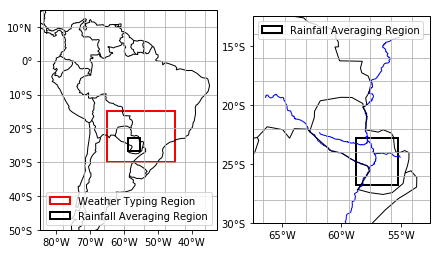

In [8]:
fig, axes = viz.SetupAxes(ncol = 2, nax = 1, proj = ccrs.PlateCarree(), figsize = [7,7])
# LEFT PLOT: Show Study area in context of South America
ax = axes[0]
ax.add_patch(wt_region())
ax.add_patch(rpy_rgn())
ax.legend(loc='lower right')

# RIGHT PLOT: Lower Paraguay River
ax = axes[1]
ax.add_patch(rpy_rgn())
rivernum_plot = [36, 1032, 1125, 294]
for rec in rivers.records():
    name = rec.attributes['name']
    num = rec.attributes['rivernum']
    if np.in1d(num, rivernum_plot):
        ax.add_geometries( [rec.geometry], ccrs.PlateCarree(), edgecolor='blue', facecolor='none')
    pass
#for i in range(desc.shape[0]):
#    ax.scatter(x=desc['lon'][i], y = desc['lat'][i], color='green')
#    ax.text(x=desc['lon'][i] + 0.25, y = desc['lat'][i] - 0.1, s = desc['name'][i], color='green')

ax.legend(loc = 'upper left')

# Countries, extents, ticks
viz.FormatAxes(axes[0], coast=True, grid=True, border=True, river = False, feature_list = [], states=False,
           extent = [-85, -32.5, -50, 15], ticks=[np.linspace(-180, 180, 37), np.linspace(-90, 90, 19)])
viz.FormatAxes(axes[1], coast=True, grid=True, border=True, river = False, feature_list = [], states=False,
           extent = [-67.5, -52.5, -30, -12.5], ticks=[np.linspace(-180, 180, 73), np.linspace(-90, 90, 37)])

if savefigs:
    fig.savefig("../_figs/StudyArea.pdf", bbox_inches='tight')